In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df1 = pd.read_csv(r"Banana2_with_rot_hours.csv")
df2 = pd.read_csv(r"Banana3_with_rot_hours.csv")
df3 = pd.read_csv(r"Banana4_with_rot_hours.csv")
df4 = pd.read_csv(r"Banana5_with_rot_hours.csv")

In [4]:
df1

,Hour,MQ2,MQ3,MQ4,MQ5,MQ9,MQ135,Temp,Hum,Hours Left to Rot
0,0,210,385,192,241,127,329,33.2,49,109
1,1,202,365,188,229,128,339,33.2,48.6,108
2,2,201,350,198,224,127,321,33.5,49.8,107
3,3,196,355,186,219,128,308,33.5,50.4,106
4,4,190,345,184,213,128,298,33.6,51.3,105
...,...,...,...,...,...,...,...,...,...,...
176,176,283,459,243,264,160,357,32.4,57.5,0
177,177,271,448,247,283,159,371,32.1,54.9,0
178,178,267,439,255,300,160,382,32.3,54.5,0
179,179,247,432,264,302,159,429,32.7,51.8,0


In [5]:
df2

,Hour,MQ2,MQ3,MQ4,MQ5,MQ9,MQ135,Temp,Hum,Hours Left to Rot
0,0,244,433,241,340,126,428,30.4,59.1,94
1,1,242,420,239,335,127,432,30.4,58,93
2,2,252,462,246,356,128,424,32.4,48.7,92
3,3,241,462,236,341,127,401,32.8,48.9,91
4,4,241,468,235,333,127,405,32.6,47,90
...,...,...,...,...,...,...,...,...,...,...
221,221,262,499,275,342,149,424,32.6,55.2,0
222,222,267,522,276,331,147,417,33.1,55.8,0
223,223,283,534,252,303,147,398,32.8,56.9,0
224,224,262,510,261,331,147,400,32.7,55.3,0


In [3]:
# function for filling the missing values of temperature and humidity attributes
def fill_nan_values(df):
    df_filled = df.copy()
    
    df_filled['Temp'] = pd.to_numeric(df_filled['Temp'], errors='coerce')
    df_filled['Hum'] = pd.to_numeric(df_filled['Hum'], errors='coerce')
    
    df_filled['Temp'] = df_filled['Temp'].interpolate(method='linear').ffill().bfill().round(1)
    df_filled['Hum'] = df_filled['Hum'].interpolate(method='linear').ffill().bfill().round(1)
    
    return df_filled

df1 = fill_nan_values(df1)
df2 = fill_nan_values(df2)
df3 = fill_nan_values(df3)
df4 = fill_nan_values(df4)

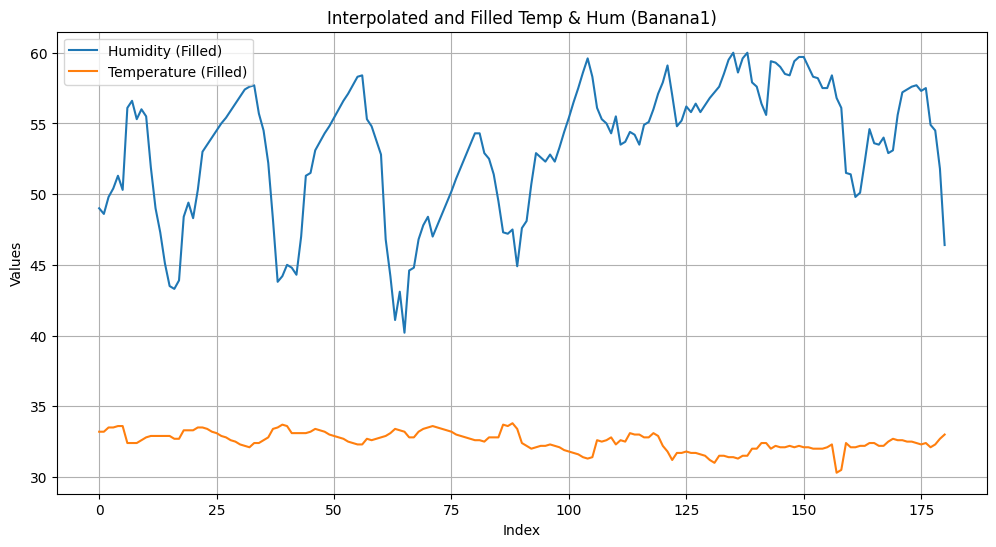

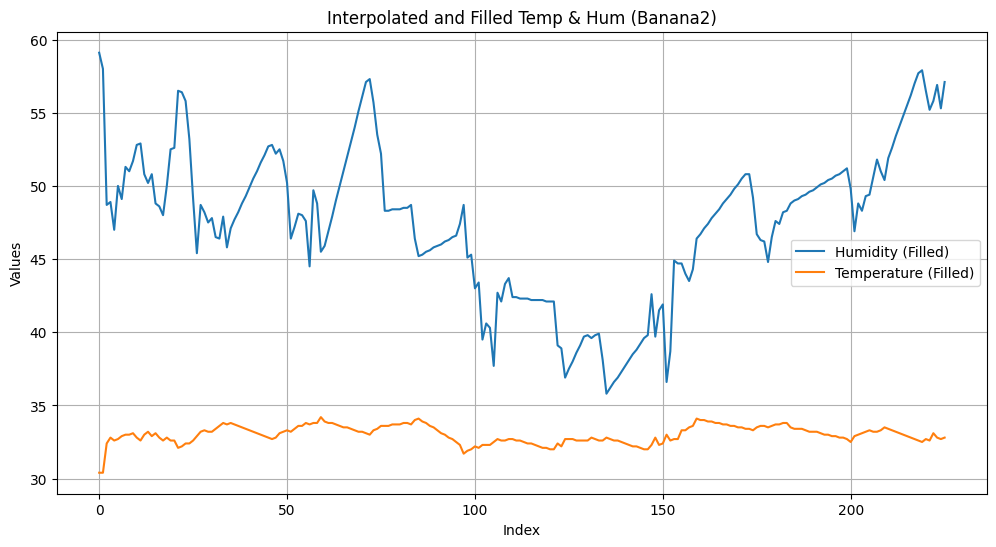

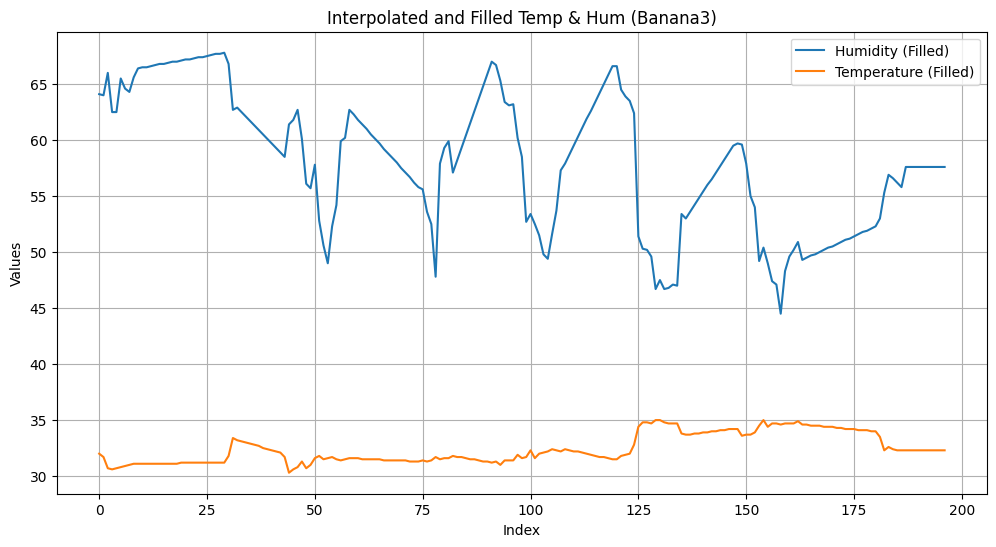

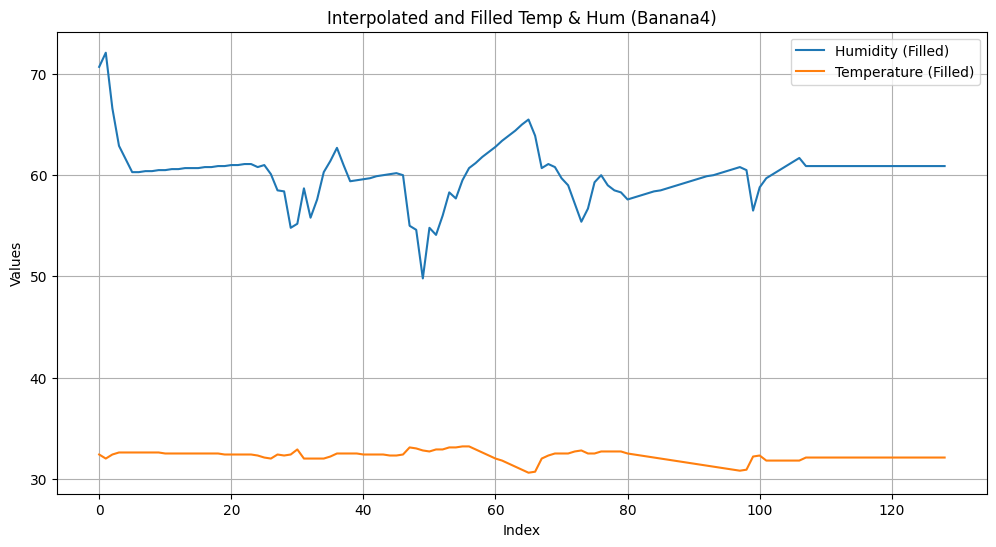

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df1['Hour'], df1['Hum'], label='Humidity (Filled)')
plt.plot(df1['Hour'], df1['Temp'], label='Temperature (Filled)')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Interpolated and Filled Temp & Hum (Banana1)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df2['Hour'], df2['Hum'], label='Humidity (Filled)')
plt.plot(df2['Hour'], df2['Temp'], label='Temperature (Filled)')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Interpolated and Filled Temp & Hum (Banana2)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df3['Hour'], df3['Hum'], label='Humidity (Filled)')
plt.plot(df3['Hour'], df3['Temp'], label='Temperature (Filled)')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Interpolated and Filled Temp & Hum (Banana3)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df4['Hour'], df4['Hum'], label='Humidity (Filled)')
plt.plot(df4['Hour'], df4['Temp'], label='Temperature (Filled)')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Interpolated and Filled Temp & Hum (Banana4)")
plt.legend()
plt.grid(True)
plt.show()


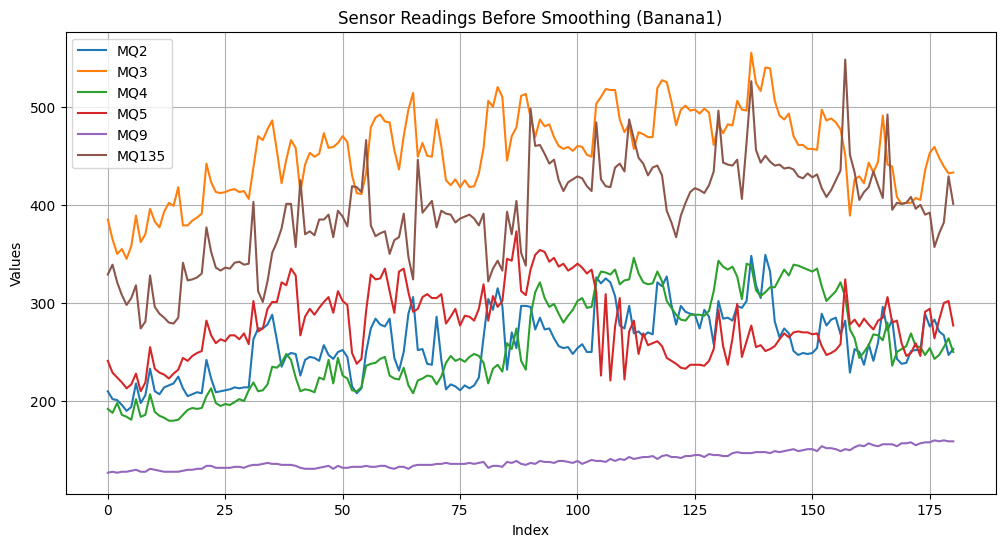

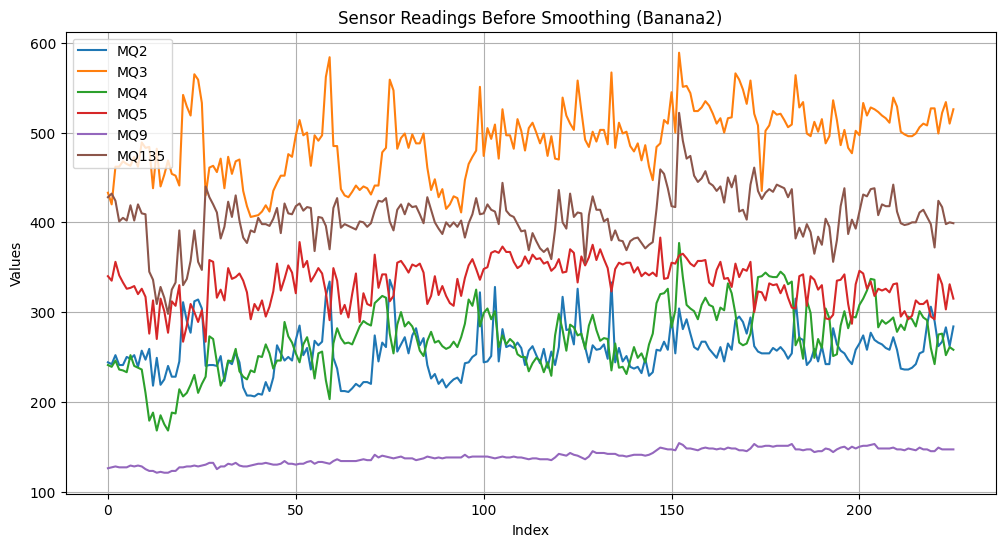

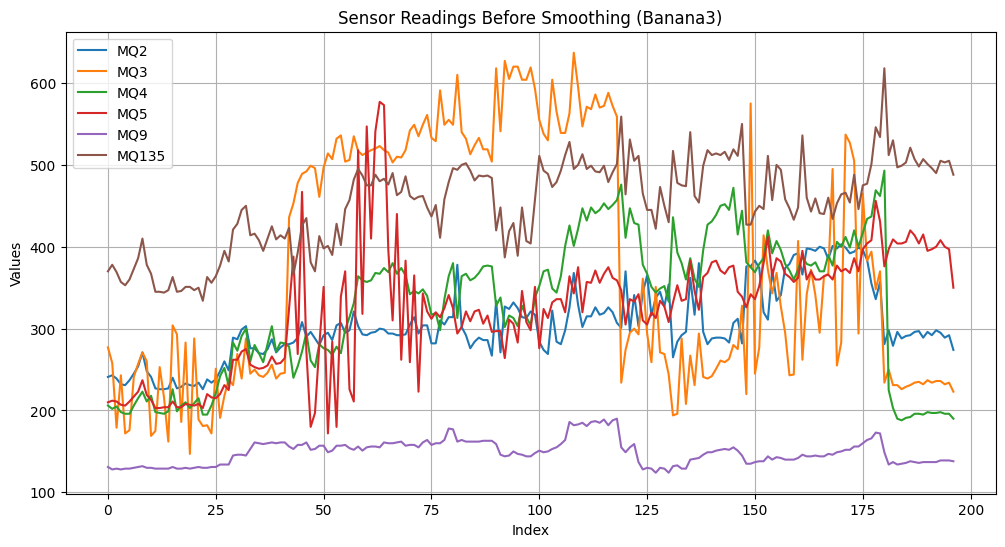

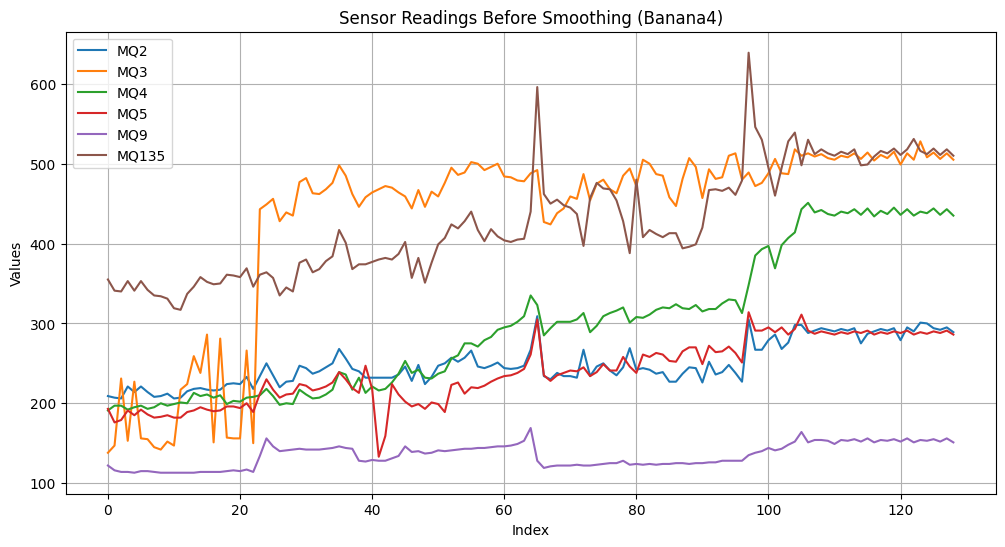

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df1['Hour'], df1['MQ2'], label='MQ2')
plt.plot(df1['Hour'], df1['MQ3'], label='MQ3')
plt.plot(df1['Hour'], df1['MQ4'], label='MQ4')
plt.plot(df1['Hour'], df1['MQ5'], label='MQ5')
plt.plot(df1['Hour'], df1['MQ9'], label='MQ9')
plt.plot(df1['Hour'], df1['MQ135'], label='MQ135')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Sensor Readings Before Smoothing (Banana1)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df2['Hour'], df2['MQ2'], label='MQ2')
plt.plot(df2['Hour'], df2['MQ3'], label='MQ3')
plt.plot(df2['Hour'], df2['MQ4'], label='MQ4')
plt.plot(df2['Hour'], df2['MQ5'], label='MQ5')
plt.plot(df2['Hour'], df2['MQ9'], label='MQ9')
plt.plot(df2['Hour'], df2['MQ135'], label='MQ135')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Sensor Readings Before Smoothing (Banana2)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df3['Hour'], df3['MQ2'], label='MQ2')
plt.plot(df3['Hour'], df3['MQ3'], label='MQ3')
plt.plot(df3['Hour'], df3['MQ4'], label='MQ4')
plt.plot(df3['Hour'], df3['MQ5'], label='MQ5')
plt.plot(df3['Hour'], df3['MQ9'], label='MQ9')
plt.plot(df3['Hour'], df3['MQ135'], label='MQ135')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Sensor Readings Before Smoothing (Banana3)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df4['Hour'], df4['MQ2'], label='MQ2')
plt.plot(df4['Hour'], df4['MQ3'], label='MQ3')
plt.plot(df4['Hour'], df4['MQ4'], label='MQ4')
plt.plot(df4['Hour'], df4['MQ5'], label='MQ5')
plt.plot(df4['Hour'], df4['MQ9'], label='MQ9')
plt.plot(df4['Hour'], df4['MQ135'], label='MQ135')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Sensor Readings Before Smoothing (Banana4)")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# smoothing with rolling mean
df1['Hum'] = df1['Hum'].rolling(window=10, min_periods=1).mean()
df1['Temp'] = df1['Temp'].rolling(window=10, min_periods=1).mean()
df1['MQ2'] = df1['MQ2'].rolling(window=10, min_periods=1).mean()
df1['MQ3'] = df1['MQ3'].rolling(window=10, min_periods=1).mean()
df1['MQ4'] = df1['MQ4'].rolling(window=10, min_periods=1).mean()
df1['MQ5'] = df1['MQ5'].rolling(window=10, min_periods=1).mean()
df1['MQ9'] = df1['MQ9'].rolling(window=10, min_periods=1).mean()
df1['MQ135'] = df1['MQ135'].rolling(window=10, min_periods=1).mean()

df2['Hum'] = df2['Hum'].rolling(window=10, min_periods=1).mean()
df2['Temp'] = df2['Temp'].rolling(window=10, min_periods=1).mean()
df2['MQ2'] = df2['MQ2'].rolling(window=10, min_periods=1).mean()
df2['MQ3'] = df2['MQ3'].rolling(window=10, min_periods=1).mean()
df2['MQ4'] = df2['MQ4'].rolling(window=10, min_periods=1).mean()
df2['MQ5'] = df2['MQ5'].rolling(window=10, min_periods=1).mean()
df2['MQ9'] = df2['MQ9'].rolling(window=10, min_periods=1).mean()
df2['MQ135'] = df2['MQ135'].rolling(window=10, min_periods=1).mean()

df3['Hum'] = df3['Hum'].rolling(window=10, min_periods=1).mean()
df3['Temp'] = df3['Temp'].rolling(window=10, min_periods=1).mean()
df3['MQ2'] = df3['MQ2'].rolling(window=10, min_periods=1).mean()
df3['MQ3'] = df3['MQ3'].rolling(window=10, min_periods=1).mean()
df3['MQ4'] = df3['MQ4'].rolling(window=10, min_periods=1).mean()
df3['MQ5'] = df3['MQ5'].rolling(window=10, min_periods=1).mean()
df3['MQ9'] = df3['MQ9'].rolling(window=10, min_periods=1).mean()
df3['MQ135'] = df3['MQ135'].rolling(window=10, min_periods=1).mean()

df4['Hum'] = df4['Hum'].rolling(window=10, min_periods=1).mean()
df4['Temp'] = df4['Temp'].rolling(window=10, min_periods=1).mean()
df4['MQ2'] = df4['MQ2'].rolling(window=10, min_periods=1).mean()
df4['MQ3'] = df4['MQ3'].rolling(window=10, min_periods=1).mean()
df4['MQ4'] = df4['MQ4'].rolling(window=10, min_periods=1).mean()
df4['MQ5'] = df4['MQ5'].rolling(window=10, min_periods=1).mean()
df4['MQ9'] = df4['MQ9'].rolling(window=10, min_periods=1).mean()
df4['MQ135'] = df4['MQ135'].rolling(window=10, min_periods=1).mean()


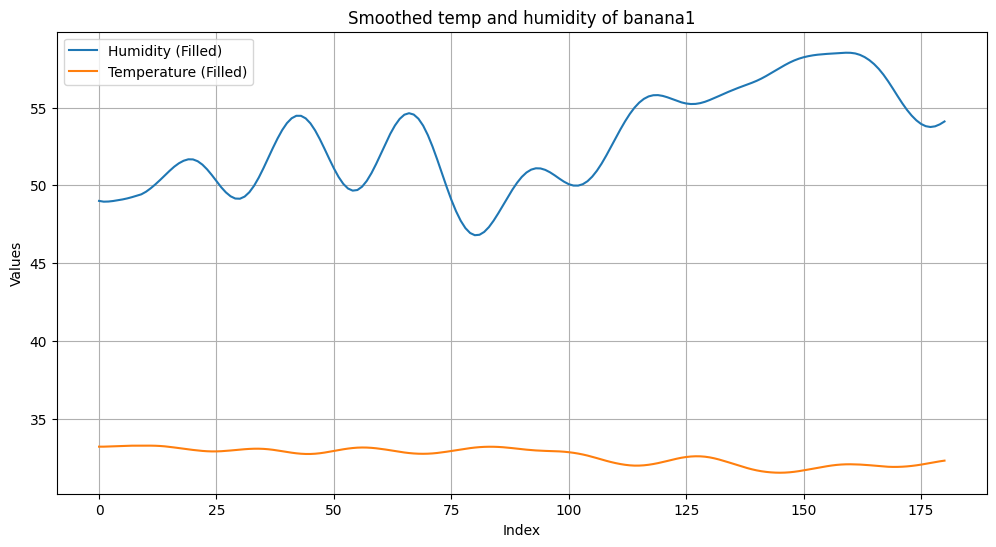

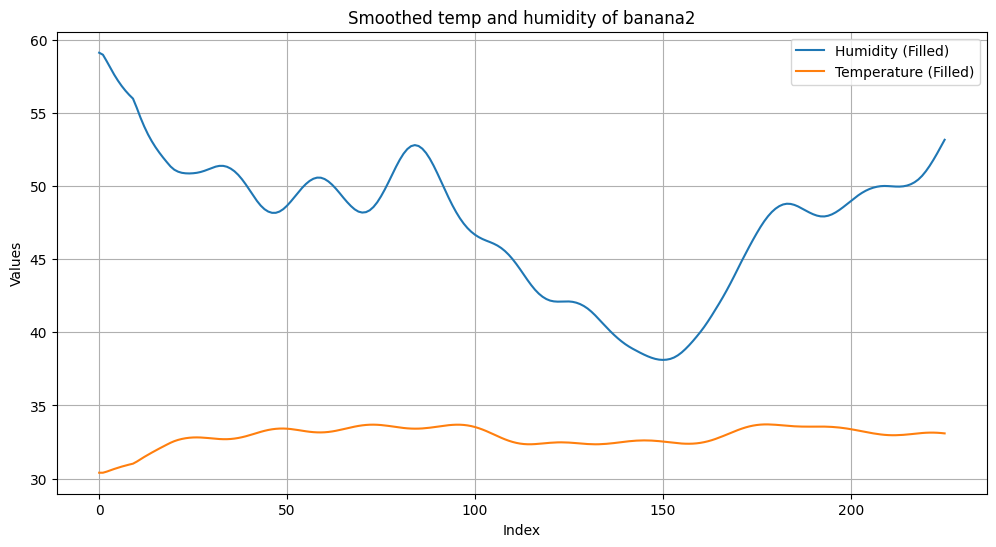

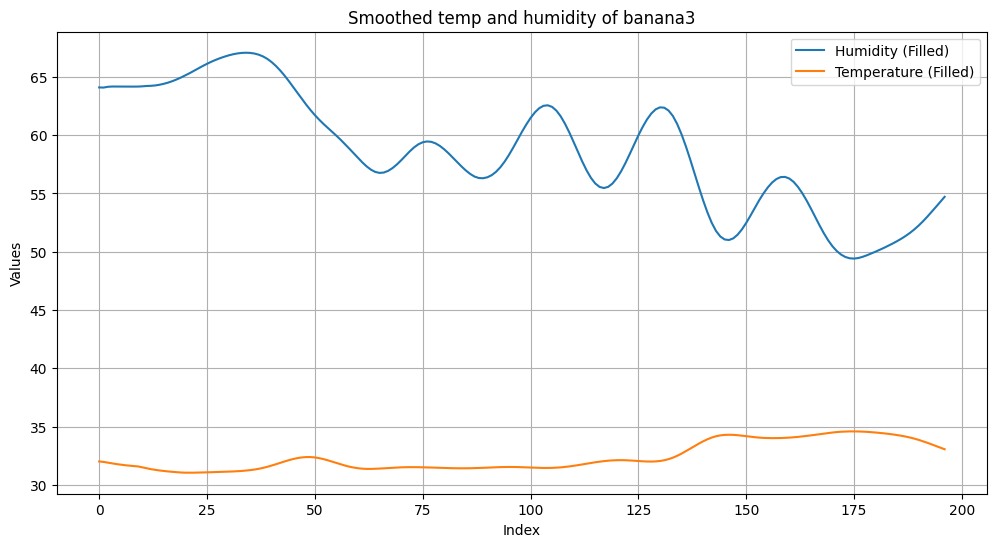

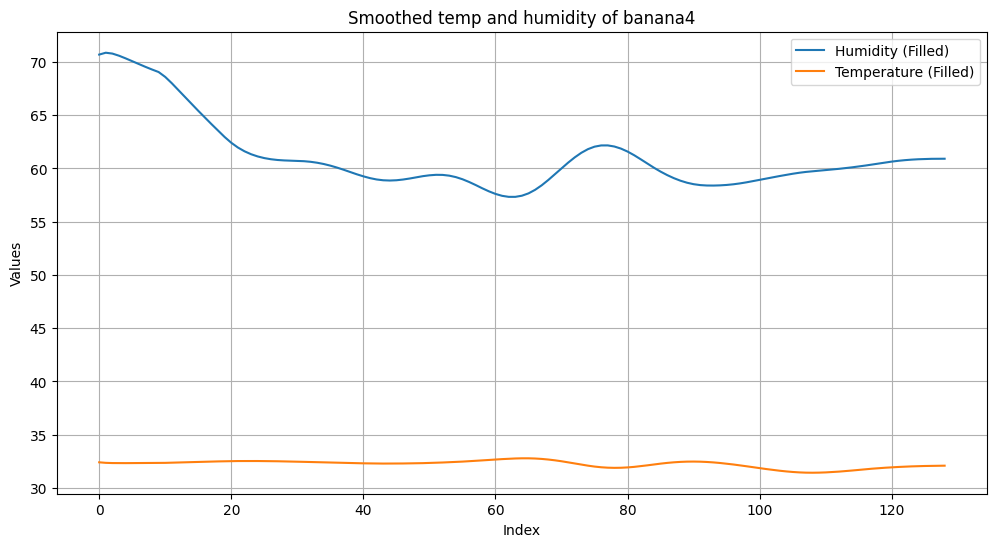

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df1['Hour'], df1['Hum'], label='Humidity (Filled)')
plt.plot(df1['Hour'], df1['Temp'], label='Temperature (Filled)')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Smoothed temp and humidity of banana1")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df2['Hour'], df2['Hum'], label='Humidity (Filled)')
plt.plot(df2['Hour'], df2['Temp'], label='Temperature (Filled)')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Smoothed temp and humidity of banana2")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df3['Hour'], df3['Hum'], label='Humidity (Filled)')
plt.plot(df3['Hour'], df3['Temp'], label='Temperature (Filled)')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Smoothed temp and humidity of banana3")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df4['Hour'], df4['Hum'], label='Humidity (Filled)')
plt.plot(df4['Hour'], df4['Temp'], label='Temperature (Filled)')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Smoothed temp and humidity of banana4")
plt.legend()
plt.grid(True)
plt.show()

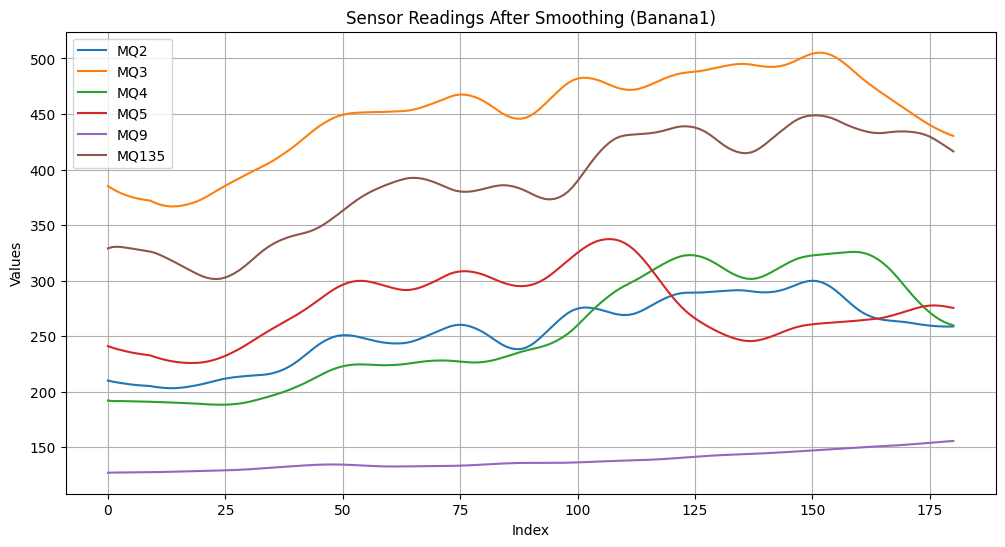

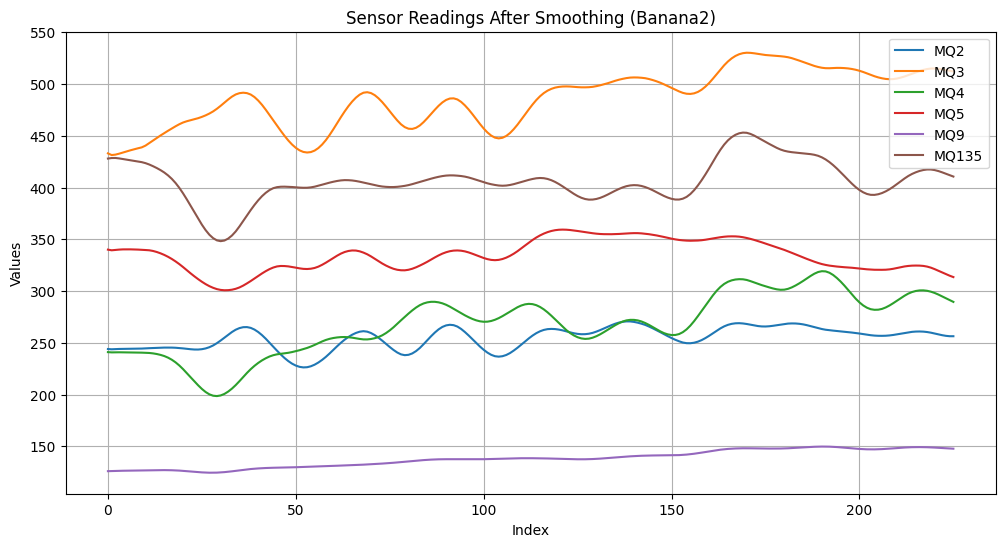

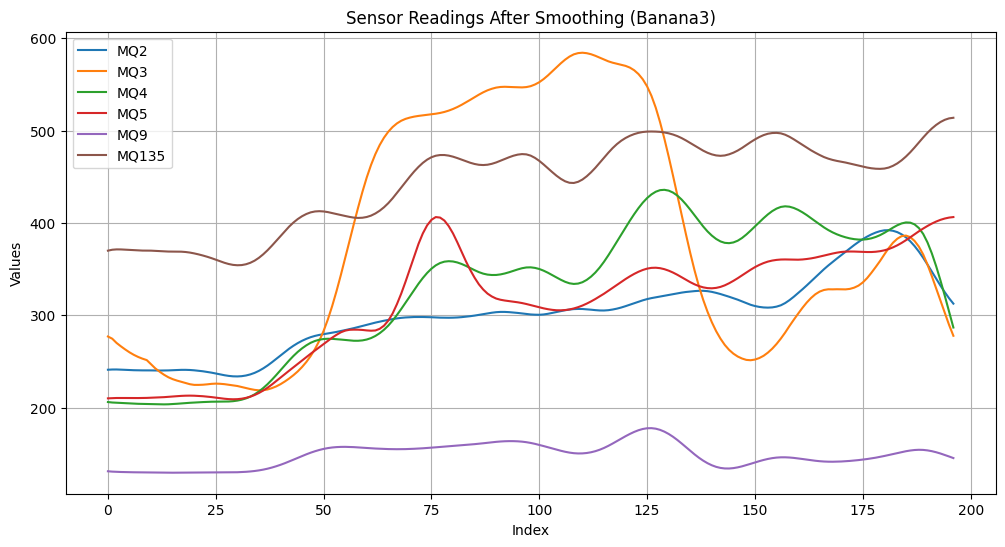

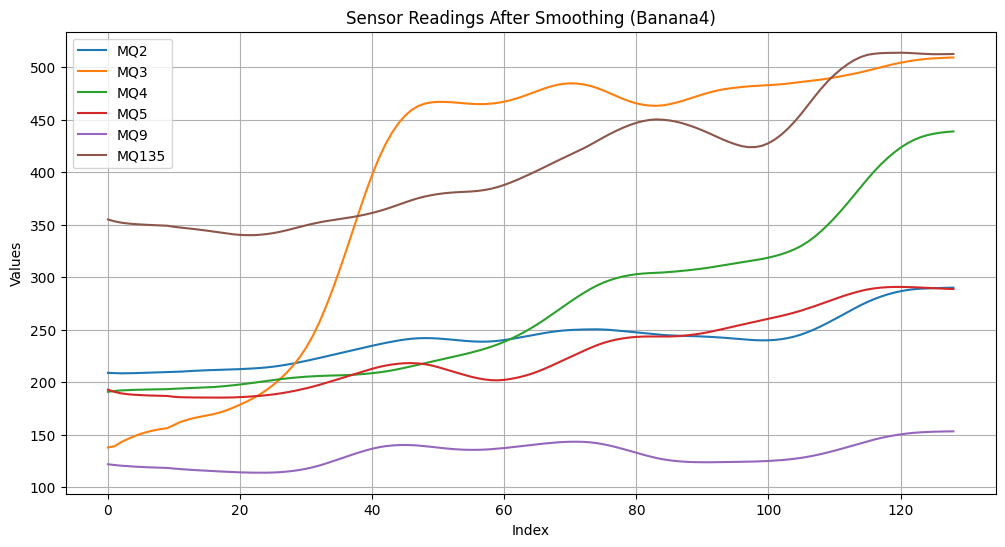

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df1['Hour'], df1['MQ2'], label='MQ2')
plt.plot(df1['Hour'], df1['MQ3'], label='MQ3')
plt.plot(df1['Hour'], df1['MQ4'], label='MQ4')
plt.plot(df1['Hour'], df1['MQ5'], label='MQ5')
plt.plot(df1['Hour'], df1['MQ9'], label='MQ9')
plt.plot(df1['Hour'], df1['MQ135'], label='MQ135')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Sensor Readings After Smoothing (Banana1)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df2['Hour'], df2['MQ2'], label='MQ2')
plt.plot(df2['Hour'], df2['MQ3'], label='MQ3')
plt.plot(df2['Hour'], df2['MQ4'], label='MQ4')
plt.plot(df2['Hour'], df2['MQ5'], label='MQ5')
plt.plot(df2['Hour'], df2['MQ9'], label='MQ9')
plt.plot(df2['Hour'], df2['MQ135'], label='MQ135')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Sensor Readings After Smoothing (Banana2)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df3['Hour'], df3['MQ2'], label='MQ2')
plt.plot(df3['Hour'], df3['MQ3'], label='MQ3')
plt.plot(df3['Hour'], df3['MQ4'], label='MQ4')
plt.plot(df3['Hour'], df3['MQ5'], label='MQ5')
plt.plot(df3['Hour'], df3['MQ9'], label='MQ9')
plt.plot(df3['Hour'], df3['MQ135'], label='MQ135')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Sensor Readings After Smoothing (Banana3)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df4['Hour'], df4['MQ2'], label='MQ2')
plt.plot(df4['Hour'], df4['MQ3'], label='MQ3')
plt.plot(df4['Hour'], df4['MQ4'], label='MQ4')
plt.plot(df4['Hour'], df4['MQ5'], label='MQ5')
plt.plot(df4['Hour'], df4['MQ9'], label='MQ9')
plt.plot(df4['Hour'], df4['MQ135'], label='MQ135')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Sensor Readings After Smoothing (Banana4)")
plt.legend()
plt.grid(True)
plt.show()


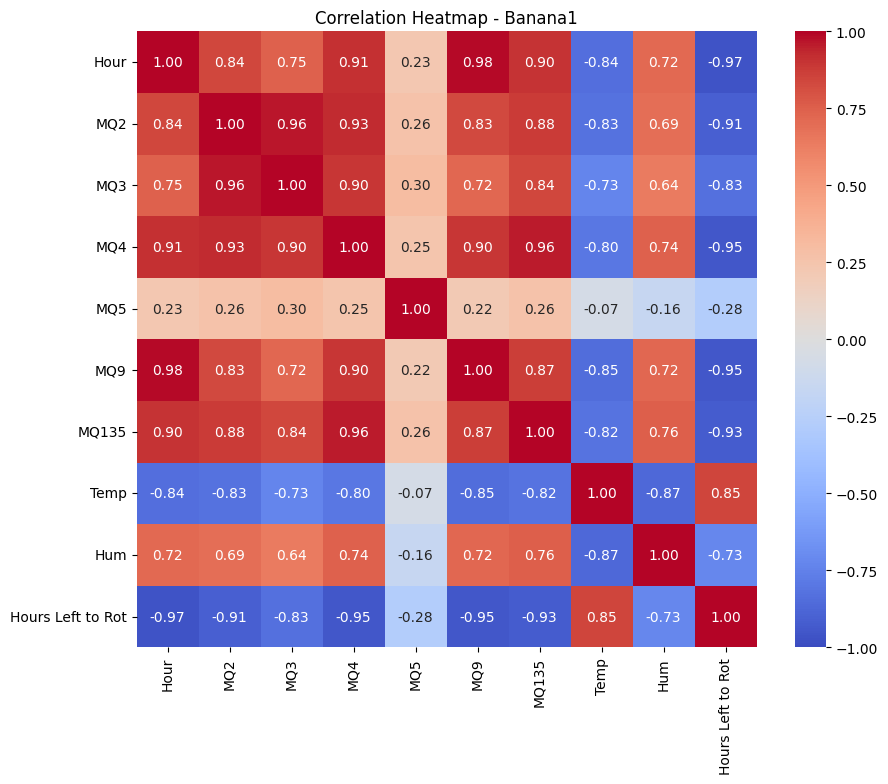

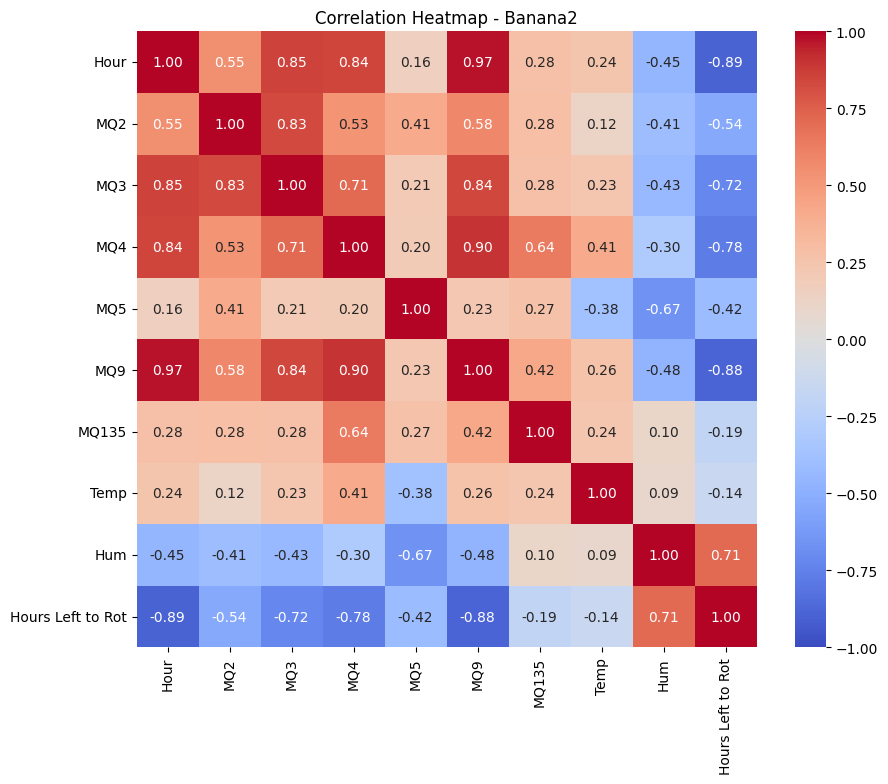

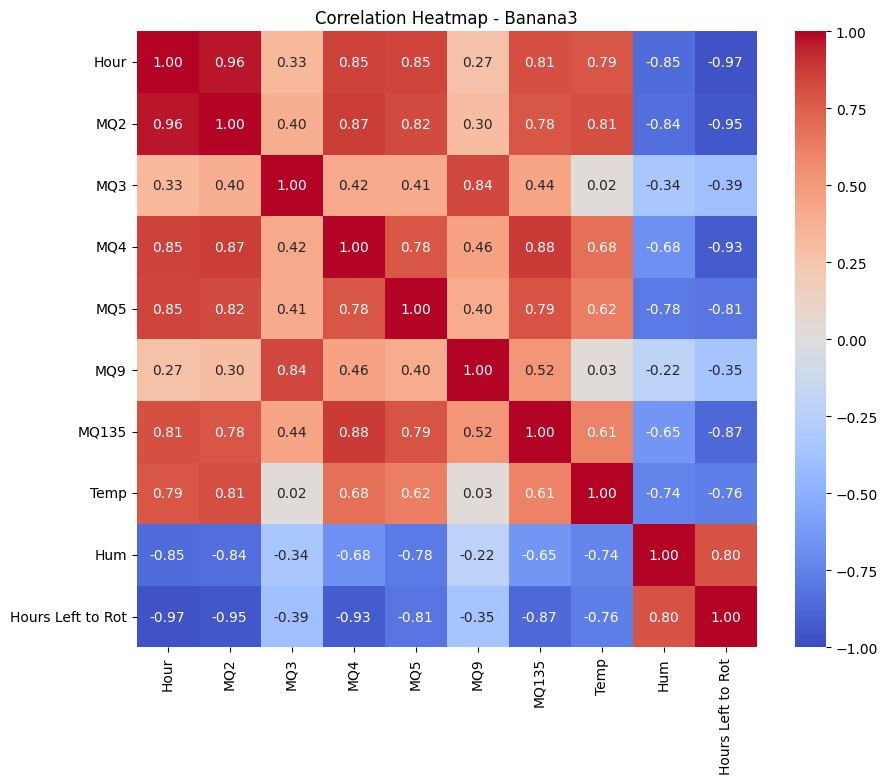

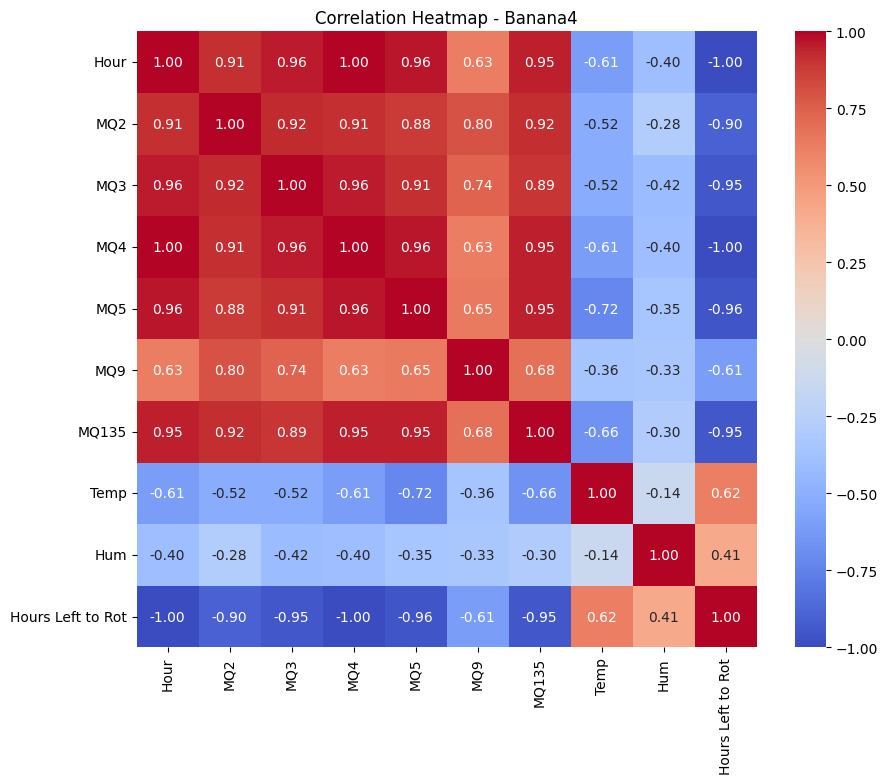

In [11]:
correlation_matrix1 = df1.corr(method='spearman')
correlation_matrix2 = df2.corr(method='spearman')
correlation_matrix3 = df3.corr(method='spearman')
correlation_matrix4 = df4.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap - Banana1')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap - Banana2')
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap - Banana3')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap - Banana4')
plt.show()

In [12]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Hour,MQ2,MQ3,MQ4,MQ5,MQ9,MQ135,Temp,Hum,Hours Left to Rot
0,0,210.000000,385.000000,192.000000,241.000000,127.000000,329.000000,33.200000,49.000000,109
1,1,209.000000,382.500000,191.500000,239.500000,127.125000,330.250000,33.200000,48.950000,108
2,2,208.259259,380.185185,191.518519,238.259259,127.175926,330.462963,33.211111,48.959259,107
3,3,207.605903,378.289931,191.493056,237.168403,127.215278,330.154514,33.223958,48.993403,106
4,4,206.980056,376.648611,191.405111,236.166056,127.249556,329.560278,33.237167,49.042856,105
...,...,...,...,...,...,...,...,...,...,...
728,124,289.419000,507.912000,435.199000,289.819000,152.729000,512.544000,32.037700,60.867300,0
729,125,289.640000,508.395000,436.588000,289.475000,152.965000,512.325000,32.053800,60.891800,0
730,126,289.828000,508.755000,437.601000,289.208000,153.130000,512.324000,32.065900,60.908100,0
731,127,289.967000,509.010000,438.327000,288.989000,153.245000,512.408000,32.075300,60.916300,0


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

features = ['Temp', 'Hum', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ9', 'MQ135']
target = 'Hours Left to Rot'

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR': SVR(kernel='rbf', C=100, gamma=0.1)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)


               Model         MSE       RMSE        MAE  R2 Score
2            XGBoost    5.235485   2.288118   1.259067  0.995073
1      Random Forest    8.034744   2.834562   1.385374  0.992439
3                SVR   19.499694   4.415846   2.329960  0.981651
0  Linear Regression  214.796661  14.655943  11.547311  0.797879


In [15]:
df_filtered = df[df['Hours Left to Rot'] > 0].copy()
df_filtered

,Hour,MQ2,MQ3,MQ4,MQ5,MQ9,MQ135,Temp,Hum,Hours Left to Rot
0,0,210.000000,385.000000,192.000000,241.000000,127.000000,329.000000,33.200000,49.000000,109
1,1,209.000000,382.500000,191.500000,239.500000,127.125000,330.250000,33.200000,48.950000,108
2,2,208.259259,380.185185,191.518519,238.259259,127.175926,330.462963,33.211111,48.959259,107
3,3,207.605903,378.289931,191.493056,237.168403,127.215278,330.154514,33.223958,48.993403,106
4,4,206.980056,376.648611,191.405111,236.166056,127.249556,329.560278,33.237167,49.042856,105
...,...,...,...,...,...,...,...,...,...,...
703,99,239.927000,482.539000,317.367000,259.059000,124.822000,425.104000,31.940300,58.814300,5
704,100,240.001000,482.863000,318.679000,260.438000,125.112000,427.595000,31.851900,58.934300,4
705,101,240.388000,483.246000,320.203000,261.837000,125.487000,431.247000,31.766200,59.054900,3
706,102,241.107000,483.746000,322.003000,263.288000,125.962000,436.005000,31.685300,59.173300,2


In [16]:
features = ['Temp', 'Hum', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ9', 'MQ135']
target = 'Hours Left to Rot'

X = df_filtered[features]
y = df_filtered[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVR': SVR(kernel='rbf', C=100, gamma=0.1)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)


               Model         MSE       RMSE       MAE  R2 Score
3                SVR   15.681358   3.959969  2.118943  0.981643
2            XGBoost   24.969460   4.996945  2.392779  0.970771
1      Random Forest   27.423127   5.236710  2.479529  0.967899
0  Linear Regression  148.771713  12.197201  9.603273  0.825849
